# Proyecto Clima En Ciudades Mayores

In [4]:
import os
import time
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point
from geopandas import GeoDataFrame
#from lat_lon_parser import parse

basedir = './GlobalTemperatures'

## Carga de Datos

In [3]:
clima = os.path.join(basedir, 'GlobalLandTemperaturesbyMajorCity' + '.csv')
dfClima = pd.read_csv(clima)
df = dfClima.copy()
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


Nos damos cuenta que nuestra variable dt es un objeto en vez de una fecha, por lo que la convertiremos para poder calcular la temporada del año

In [4]:
dfClima.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [5]:
df['dt'] = pd.to_datetime(dfClima['dt'])
df.dtypes, display(df)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


(dt                               datetime64[ns]
 AverageTemperature                      float64
 AverageTemperatureUncertainty           float64
 City                                     object
 Country                                  object
 Latitude                                 object
 Longitude                                object
 dtype: object,
 None)

Una vez que ya lo poseemos como algo de clase fecha es cuando sacaremos el mes para luego reemplazarlo por la temporada

In [6]:
df['Season'] = pd.DatetimeIndex(df['dt']).month
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Season
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,2
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,3
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,4
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,5
...,...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E,5
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E,6
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E,7
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E,8


Usamos un diccionario de valores para reemplazar los valores de los meses por las temporadas

In [7]:
valores_unicos = df.Season.unique().tolist()
encoded_values = {}
for i in valores_unicos:
    if i <= 3:
        temporada = 'Invierno'
    elif i <= 6:
        temporada = 'Primavera'
    elif i <= 9:
        temporada = 'Verano'
    else:
        temporada = 'Otoño'

    encoded_values[i] = temporada

df['Season'].replace(encoded_values, inplace = True)
df.dropna(inplace = True)
df['Latitude'] = df['Latitude'].apply(lambda x:  parse(x))
df['Longitude'] = df['Longitude'].apply(lambda x: parse(x))
df.drop(['AverageTemperatureUncertainty'], axis = 1, inplace = True)
df

,dt,AverageTemperature,City,Country,Latitude,Longitude,Season
0,1849-01-01,26.704,Abidjan,Côte D'Ivoire,5.63,-3.23,Invierno
1,1849-02-01,27.434,Abidjan,Côte D'Ivoire,5.63,-3.23,Invierno
2,1849-03-01,28.101,Abidjan,Côte D'Ivoire,5.63,-3.23,Invierno
3,1849-04-01,26.140,Abidjan,Côte D'Ivoire,5.63,-3.23,Primavera
4,1849-05-01,25.427,Abidjan,Côte D'Ivoire,5.63,-3.23,Primavera
...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,Xian,China,34.56,108.97,Primavera
239172,2013-05-01,18.979,Xian,China,34.56,108.97,Primavera
239173,2013-06-01,23.522,Xian,China,34.56,108.97,Primavera
239174,2013-07-01,25.251,Xian,China,34.56,108.97,Verano


Ya teniendo este archivo lo guardamos como csv para usarlo posteriormente

In [8]:
# Esta linea ya se corrio una vez, se queda por documentación
#df.to_csv(os.path.join(basedir, 'GLTbyMC_corrected.csv'), index = False)

## Comprensión de negocio y datos

Como podemos ver, estos datos seran datos de panel, ya que son varios sujetos a lo largo del tiempo

In [19]:
filename = 'GLTbyMC_corrected.csv'
filepath  = os.path.join(basedir, filename)
data = pd.read_csv(filepath)
data['dt'] = pd.to_datetime(data['dt'])
data

,dt,AverageTemperature,City,Country,Latitude,Longitude,Season
0,1849-01-01,26.704,Abidjan,Côte D'Ivoire,5.63,-3.23,Invierno
1,1849-02-01,27.434,Abidjan,Côte D'Ivoire,5.63,-3.23,Invierno
2,1849-03-01,28.101,Abidjan,Côte D'Ivoire,5.63,-3.23,Invierno
3,1849-04-01,26.140,Abidjan,Côte D'Ivoire,5.63,-3.23,Primavera
4,1849-05-01,25.427,Abidjan,Côte D'Ivoire,5.63,-3.23,Primavera
...,...,...,...,...,...,...,...
228170,2013-04-01,12.563,Xian,China,34.56,108.97,Primavera
228171,2013-05-01,18.979,Xian,China,34.56,108.97,Primavera
228172,2013-06-01,23.522,Xian,China,34.56,108.97,Primavera
228173,2013-07-01,25.251,Xian,China,34.56,108.97,Verano


También vemos que no tenemos nulos en nuestro dataset

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228175 entries, 0 to 228174
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   dt                  228175 non-null  datetime64[ns]
 1   AverageTemperature  228175 non-null  float64       
 2   City                228175 non-null  object        
 3   Country             228175 non-null  object        
 4   Latitude            228175 non-null  float64       
 5   Longitude           228175 non-null  float64       
 6   Season              228175 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 12.2+ MB


Posteriormente realizamos una tabla para ver de mejor manera las variables de nuestro dataset

In [12]:
dt = ['dt', 'Análisis', 'caracteres', 'intervalo', 'datetime', 'Entre 1743-11-01 y 2013-09-01', 'Cambio de la temperatura a lo largo de los años']
at = ['AverageTemperature', 'Observación', 'numeros', 'de razón', 'float64', 'Cualquiera en la escala Celsius', 'NA']
city = ['City', 'Análisis', 'caracteres', 'nominales', 'object', 'Cualquier ciudad', 'Cambio de la temperatura en distintas ciudades']
country = ['Country', 'Análisis', 'caracteres', 'nominales', 'object', 'Paises del mundo', 'Cambio de la temperatura agrupando por pais']
lt = ['Latitude', '', 'numeros', 'intervalo', 'float64', 'de -90 a 90', 'Se puede analizar por zona del mundo o para hacer mapas']
ln = ['Longitude', '', 'numeros', 'intervalo', 'float64', 'de -180 a 180', 'Se puede analizar por zona del mundo o para hacer mapas']
ss = ['Season', 'Análisis', 'caracteres', 'nominales', 'object', 'Primavera/Verano/Otoño/Invierno', 'Cambio de temperatura por epoca del año']

listaDatos = [dt, at, city, country, lt, ln, ss]

explicacion = pd.DataFrame(listaDatos, columns=['Columna', 'Unidad de:', 'Tipo csv', 'Tipo de dato', 'Tipo en python', 'Valores válidos', 'Pregunta a responder'])
explicacion

,Columna,Unidad de:,Tipo csv,Tipo de dato,Tipo en python,Valores válidos,Pregunta a responder
0,dt,Análisis,caracteres,intervalo,datetime,Entre 1743-11-01 y 2013-09-01,Cambio de la temperatura a lo largo de los años
1,AverageTemperature,Observación,numeros,de razón,float64,Cualquiera en la escala Celsius,NA
2,City,Análisis,caracteres,nominales,object,Cualquier ciudad,Cambio de la temperatura en distintas ciudades
3,Country,Análisis,caracteres,nominales,object,Paises del mundo,Cambio de la temperatura agrupando por pais
4,Latitude,,numeros,intervalo,float64,de -90 a 90,Se puede analizar por zona del mundo o para ha...
5,Longitude,,numeros,intervalo,float64,de -180 a 180,Se puede analizar por zona del mundo o para ha...
6,Season,Análisis,caracteres,nominales,object,Primavera/Verano/Otoño/Invierno,Cambio de temperatura por epoca del año


## Análisis Univariado

#### Latitud y Longitud
Cargamos un mapa del mundo para observar donde estan nuestras ciudades a analizar
Vemos que estan distribuidas a lo largo del mundo, con una concentración en la zona de India y China

<AxesSubplot:>

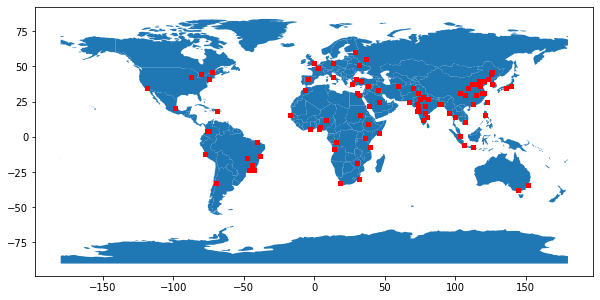

In [3]:
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
gdf = GeoDataFrame(data, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

#### Temperaturas
- La mayoria de las temperaturas están entre 10 y 30 grados con la mayor concentración dandose despues de los 20
- Cualquier temperatura abajo de ~7° es considerada como outlier

C:\Users\Rafael\AppData\Local\Temp\ipykernel_21768\2491509424.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data['AverageTemperature'], kde= True, bins=100)


<AxesSubplot:ylabel='Density'>

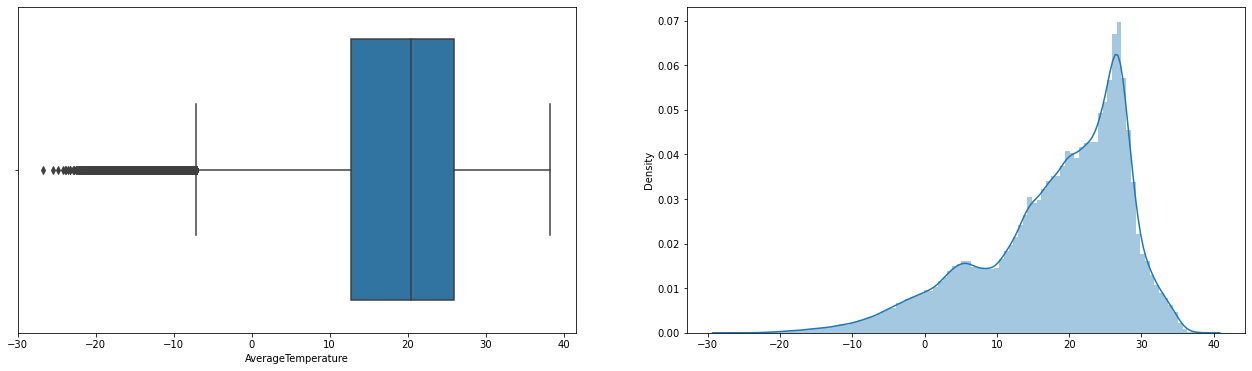

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(22,6))

plt.subplot(1, 2, 1)
sns.boxplot(x= data['AverageTemperature'])

plt.subplot(1, 2, 2)
sns.distplot(x = data['AverageTemperature'], kde= True, bins=100)

#### Ciudad / País / Temporada / Fechas
- Como ya veiamos en el mapa tenemos muchas ciudades y también paises
- Las temporadas son las 4 que conocemos
- No todas las ciudades poseen la misma cantidad de registros, hay unas con menos y otras con más
- Los dos paises que tienen mas datos son India y China, cada uno con ~15% de los datos
- El país con menos datos es peru, que solo tiene a Lima y tiene ~0.6% de los datos totales
- Las temporadas se encuentran distribuidas de manera uniforme
- Las fechas no poseen todas la misma cantidad de registro, teniendo las menores cantidades en los años mas antiguos y el mas reciente en el dataset que es el 2013

In [21]:
nom_cats = ['City','Country','Season', 'dt']

for col in nom_cats:

    print('Variable: ', col)
    if len(data[col].unique()) > 15:
        print('Variable de alta cardinalidad')
    else:
        print('Variable de baja cardinalidad')
    print(data[col].value_counts(sort=True,normalize=True))
    print('')
    print('')

Variable:  City
Variable de alta cardinalidad
Madrid              0.013875
Berlin              0.013875
London              0.013875
Saint Petersburg    0.013875
Rome                0.013875
                      ...   
Addis Abeba         0.007358
Nairobi             0.007354
Fortaleza           0.007271
Dar Es Salaam       0.006951
Lima                0.006666
Name: City, Length: 100, dtype: float64


Variable:  Country
Variable de alta cardinalidad
China                                 0.153181
India                                 0.151756
Brazil                                0.053200
Turkey                                0.040491
United States                         0.036099
Egypt                                 0.033089
Pakistan                              0.028443
Russia                                0.027751
Canada                                0.027531
Nigeria                               0.022790
Australia                             0.018135
Japan                      

## Análisis Bivariado